IMPORTING SOME LIBRARIES


In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


Load the Dataset

In [249]:
df = pd.read_csv("/content/spam.csv",encoding='ISO-8859-1')

In [250]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [251]:
df.shape

(5572, 5)

Data *Cleaning*

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [253]:
df.drop(['Unnamed: 2','Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)

In [254]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [255]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [256]:
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [257]:
df[df['target']==1].head()

,target,text


In [258]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

Exploratory Data Analysis

In [259]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

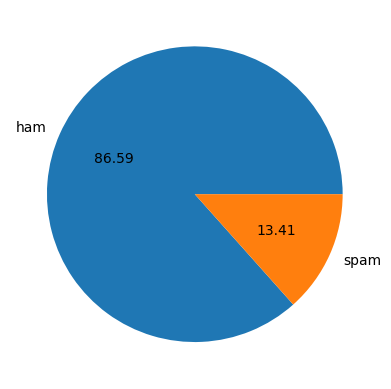

In [260]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [261]:
#Data is Imbalanced

In [262]:
df['number_of_character']=df['text'].apply(len)

In [263]:
nltk.download('punkt')
df['number_of_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [264]:
df['number_of_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [265]:
df.head()

,target,text,number_of_character,number_of_words,number_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


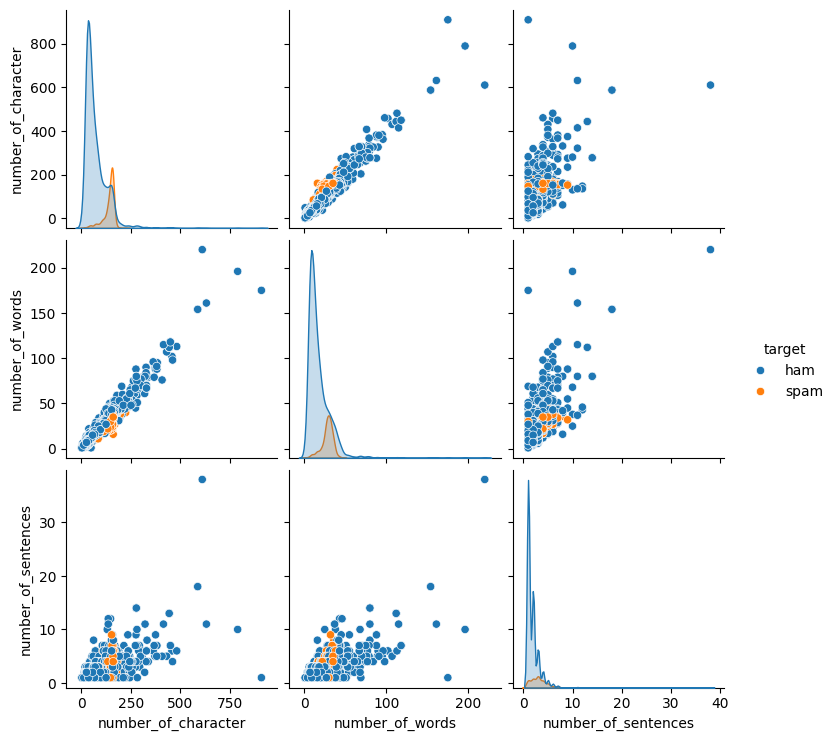

In [266]:
sns.pairplot(df,hue='target')

Data Preprocessing

In [267]:
#lower case
#Tokenization
#Remove stop words and punctuation
#Stemming

In [268]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string as str
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [269]:
ps = PorterStemmer()

In [270]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
      if i.isalnum():
          y.append(i)

  text=y[:]
  y.clear()

  for i in text:
      if i not in stopwords.words('english') and i not in str.punctuation:
          y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [271]:
df.head()

,target,text,number_of_character,number_of_words,number_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [272]:
df['transform_text'] = df['text'].apply(transform_text)

In [273]:
df.head()

,target,text,number_of_character,number_of_words,number_of_sentences,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [274]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Spam words')

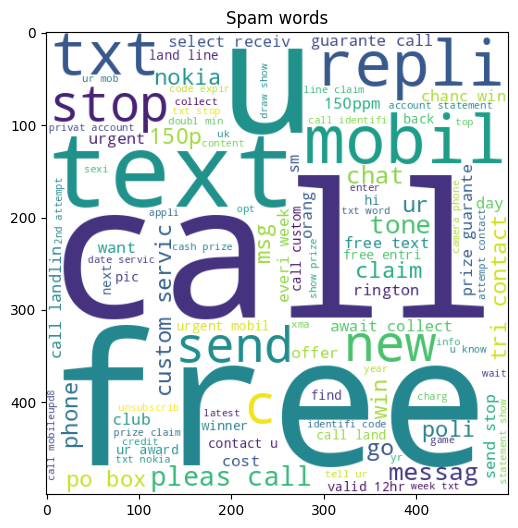

In [275]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']=='spam']['transform_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Spam words')



Text(0.5, 1.0, 'Ham words')

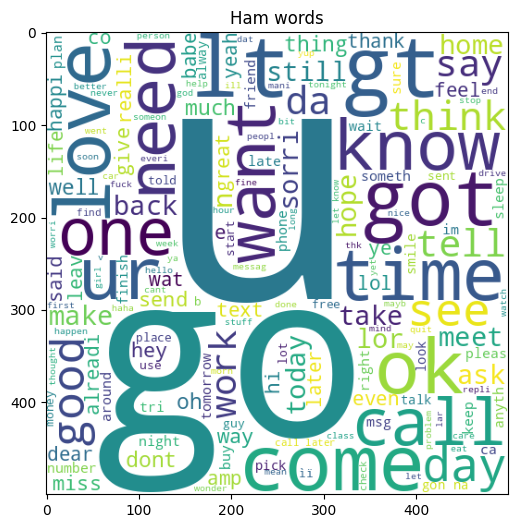

In [276]:
ham_wc = wc.generate(df[df['target']=='ham']['transform_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('Ham words')


Target features encoding

In [277]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [278]:
df.drop(['text','number_of_character','number_of_words','number_of_sentences'],axis=1,inplace=True)

In [279]:
df.head()

,target,transform_text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [280]:
df['transform_text'][56]

'congrat 1 year special cinema pass 2 call 09061209465 c suprman v matrix3 starwars3 etc 4 free 150pm dont miss'

In [281]:
spam_corpus = []
for i in df[df['target']==1]['transform_text'].tolist():
  for j in i.split():
    spam_corpus.append(j)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [282]:
from collections import Counter

Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [283]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


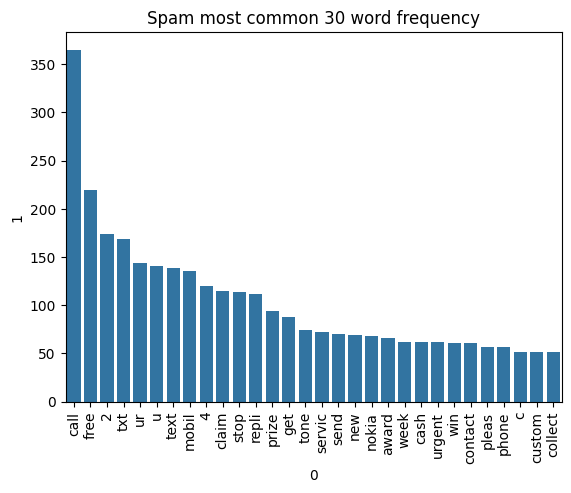

In [284]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Spam most common 30 word frequency")
plt.show()

In [285]:
ham_corpus = []
for i in df[df['target']==0]['transform_text'].tolist():
  for j in i.split():
    ham_corpus.append(j)
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [286]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


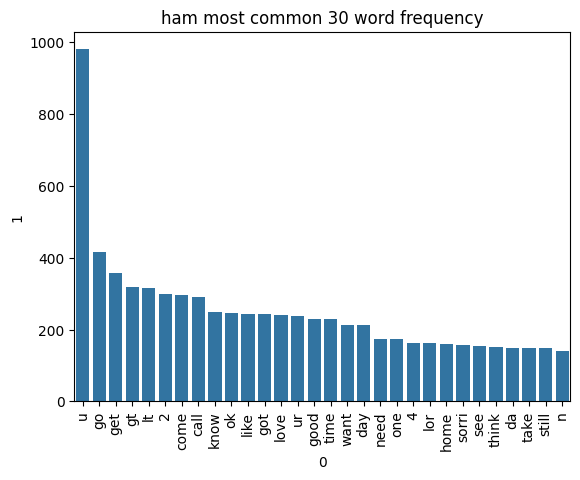

In [287]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("ham most common 30 word frequency")
plt.show()

Text Vectorization


In [288]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [289]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [290]:
#x = cv.fit_transform(df['transform_text'])
#tfidf vectorizer performance is so well
x = tfidf.fit_transform(df['transform_text']).toarray()
x.shape

(5572, 3000)

Scaling vectorize_transform_text

In [291]:
from sklearn.preprocessing import StandardScaler


In [292]:
sc = StandardScaler(with_mean=False)
x = sc.fit_transform(x)

In [293]:
x.shape

(5572, 3000)

In [294]:
y = df['target']

In [295]:
y.shape

(5572,)

Split the data into train data and test data

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [298]:
x.shape,x_train.shape,x_test.shape

((5572, 3000), (4457, 3000), (1115, 3000))

Model Implementation

In [299]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [300]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [301]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
adc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [302]:
classifiers = {

               'SVC' : svc,
               'KN' : knc,
               'NB' : mnb,
               'DTC' : dtc,
               'LR' : lrc,
               'GNB' : gnb,
               'BNB' : bnb,
               'RF' : rfc,
               'AdaBoost' : adc,
               'BGC' : bc,
               'ETC' : etc,
               'GBDT' : gbdt,
               'XGB' : xgb,


}

In [303]:
def train_classifier(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [304]:
accuracy_scores = []
precision_scores = []

for name,model in classifiers.items():

    current_accuracy,current_precision = train_classifier(model, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8932735426008969
Precision -  0.6466165413533834
For  KN
Accuracy -  0.8968609865470852
Precision -  1.0
For  NB
Accuracy -  0.9506726457399103
Precision -  0.7909604519774012
For  DTC
Accuracy -  0.9255605381165919
Precision -  0.8865979381443299
For  LR
Accuracy -  0.9695067264573991
Precision -  0.9920634920634921
For  GNB
Accuracy -  0.8573991031390135
Precision -  0.4980544747081712
For  BNB
Accuracy -  0.9748878923766816
Precision -  0.9850746268656716
For  RF
Accuracy -  0.9659192825112107
Precision -  0.9838709677419355
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.959349593495935
For  BGC
Accuracy -  0.95695067264574
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9713004484304932
Precision -  0.9921875
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307
For  XGB
Accuracy -  0.9614349775784753
Precision -  0.967479674796748


In [305]:
DataFrame = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy', ascending=False)

In [306]:
DataFrame

,Algorithm,Accuracy,Precision
6,BNB,0.974888,0.985075
10,ETC,0.971300,0.992188
4,LR,0.969507,0.992063
7,RF,0.965919,0.983871
12,XGB,0.961435,0.967480
8,AdaBoost,0.959641,0.959350
9,BGC,0.956951,0.916667
2,NB,0.950673,0.790960
11,GBDT,0.936323,0.930693
3,DTC,0.925561,0.886598


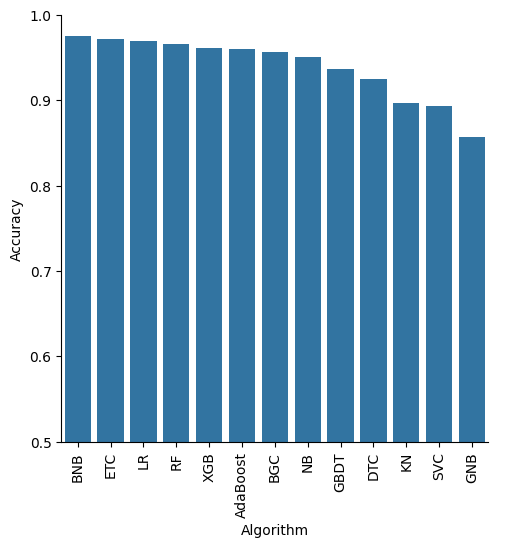

In [307]:
sns.catplot(x='Algorithm',y='Accuracy',data=DataFrame,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Apply Voting Classifier

In [308]:
from sklearn.ensemble import VotingClassifier


In [309]:
voting = VotingClassifier(estimators=[('BNB' , bnb),('ETC' , etc,),('LR' , lrc)],voting='soft')

In [310]:
voting.fit(x_train,y_train)
y_test_pred = voting.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_test_pred))
print('Precision',precision_score(y_test,y_test_pred))

Accuracy 0.9748878923766816
Precision 1.0


Applying stacking

In [311]:
from sklearn.ensemble import StackingClassifier


In [312]:
estimators = [('BNB' , bnb),('ETC' , etc,),('LR' , lrc)]
final_estimator = RandomForestClassifier()

In [313]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [314]:
clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_test_pred))
print('Precision',precision_score(y_test,y_test_pred))


Accuracy 0.9838565022421525
Precision 0.9861111111111112


Building a prediction system for evaluating

In [324]:
input = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18']
input = [transform_text(item) for item in input]
input = tfidf.transform(input)
prediction = bnb.predict(input)
if prediction==1:
  print('Spam Message ')
else:
  print("Not Spam Message")


Spam Message 
